In [12]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") 

In [13]:
from keras.models import Sequential 


In [14]:
from keras.layers import Dense, LSTM 


In [50]:
df = web.DataReader("AABB", data_source="yahoo", start="2015-01-01", end="2021-03-02")

In [51]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,0.0150,0.0150,0.01500,0.0150,0,0.0150
2015-01-05,0.0150,0.0150,0.01500,0.0150,0,0.0150
2015-01-06,0.0150,0.0150,0.01500,0.0150,0,0.0150
2015-01-07,0.0150,0.0150,0.01500,0.0150,0,0.0150
2015-01-08,0.0150,0.0150,0.01500,0.0150,0,0.0150
...,...,...,...,...,...,...
2021-02-24,0.4991,0.2110,0.49900,0.2701,337495454,0.2701
2021-02-25,0.3100,0.1950,0.29900,0.2000,230436948,0.2000
2021-02-26,0.2800,0.2050,0.22010,0.2390,126946609,0.2390


In [52]:
df.shape

(1551, 6)

Text(0, 0.5, 'Close Price USD ($)')

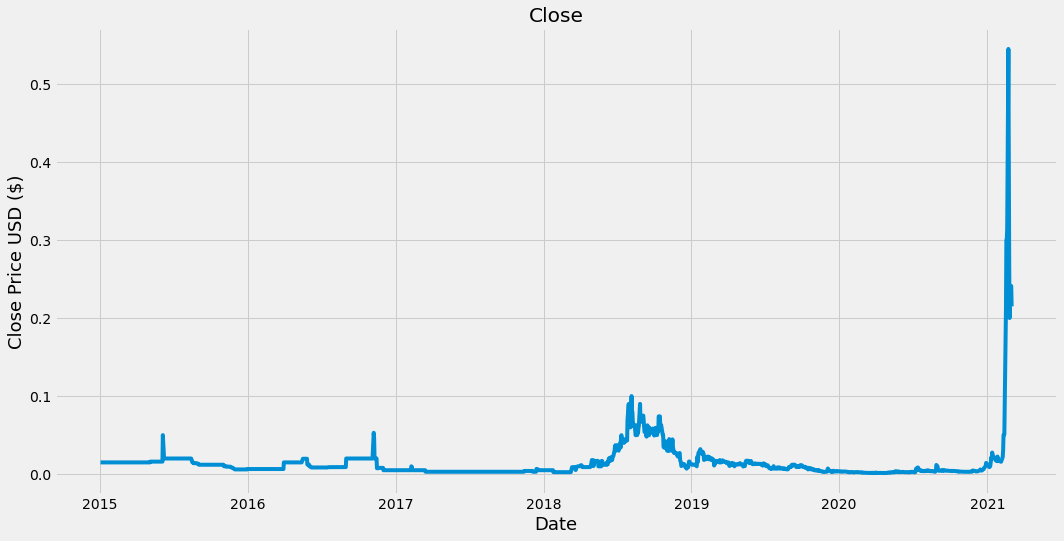

In [53]:
plt.figure(figsize=(16,8))
plt.title("Close")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)

In [54]:
data = df.filter(["Close"])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

In [55]:
training_data_len

1241

In [56]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [57]:
scaled_data

array([[0.02520699],
       [0.02520699],
       [0.02520699],
       ...,
       [0.43735051],
       [0.44103037],
       [0.39319229]])

In [59]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699,
       0.02520699, 0.02520699, 0.02520699, 0.02520699, 0.02520699])]
[0.025206991862287517]



In [60]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [61]:
x_train.shape

(1181, 60)

In [64]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
x_train.shape

(1181, 60, 1)

In [71]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))

SyntaxError: positional argument follows keyword argument (<ipython-input-71-c9c7c4ebf3a3>, line 2)